# Lab2 ML Sklearn

# Talh Hossin S2310831

# Part 1: Setting Up Your Environment

In [13]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [16]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [17]:
print(df.columns.tolist())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label', 'species']


In [18]:
print(df.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
label                  int64
species               object
dtype: object


In [19]:
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
species              0
dtype: int64


In [20]:
{df.duplicated().sum()}

{np.int64(1)}

# Part 2: Loading and Exploring Data

In [21]:
import sklearn
print(f'scikit-learn version: {sklearn.__version__}')
import numpy as np
import matplotlib.pyplot as plt
print('All libraries loaded successfully!')

scikit-learn version: 1.6.1
All libraries loaded successfully!


In [22]:
from sklearn.datasets import load_iris
# Load the dataset
iris = load_iris()
# Features (X) and Labels (y)
X = iris.data # Shape: (150, 4)
y = iris.target # Shape: (150,)
# Let‘s see what we have
print(f'Feature names: {iris.feature_names}')
print(f'Target names: {iris.target_names}')
print(f'Data shape: {X.shape}')
print(f'First 3 rows:\n{X[:3]}')

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)
First 3 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


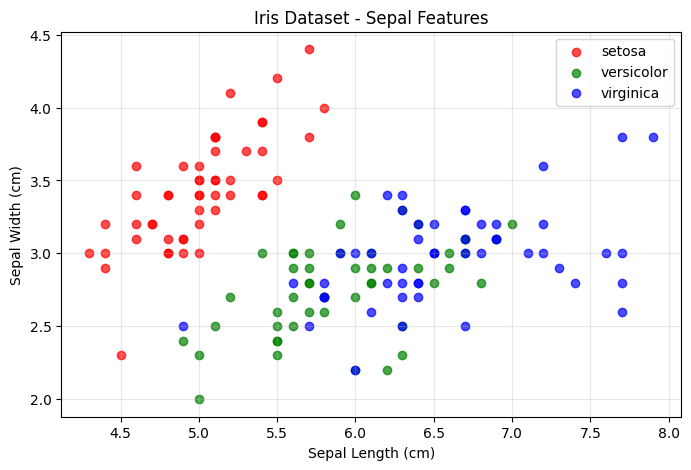

In [23]:
plt.figure(figsize=(8, 5))
colors = ['red', 'green', 'blue']
for i, name in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1],
                color=colors[i], label=name, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Task 1 : Explore the Data

In [24]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

In [25]:
# A) First 10 rows of features and labels side by side
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y
df['species'] = df['label'].map({i: name for i, name in enumerate(iris.target_names)})
print("First 10 rows of features and labels:")
print(df.head(10))

First 10 rows of features and labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   label species  
0      0  setosa  
1      0  setosa  
2      0  setosa  
3      0  setosa

In [26]:
# B):  Use np.unique(y, return_counts=True) to check the class distribution.
classes, counts = np.unique(y, return_counts=True)
print("Classes:", classes)
print("Counts:", counts)
print("Class distribution:", dict(zip(classes, counts)))

Classes: [0 1 2]
Counts: [50 50 50]
Class distribution: {np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}


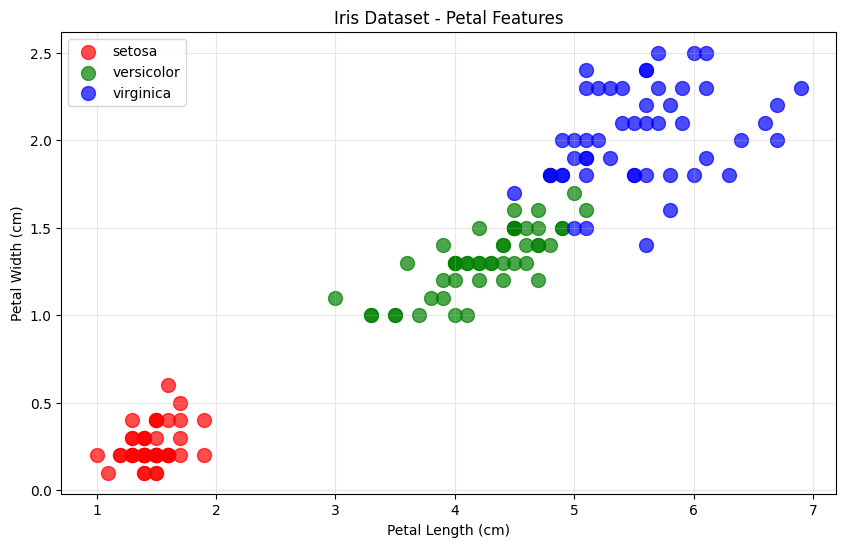

In [27]:
# C): Create scatter plot using petal length (column 2) vs petal width (column 3)
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i, name in enumerate(iris.target_names):
    subset = df[df['label'] == i]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                color=colors[i], label=name, alpha=0.7, s=100)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Looking at both plots, the petal measurements do a much better job telling the flowers apart. You can clearly see the red flowers (Setosa) forming their own separate cluster, while the green and blue ones are more mixed up in the sepal plot

# Part 3: Splitting Data (train/test)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2, # 20% for testing
random_state=42, # For reproducibility
stratify=y # Keep class proportions balanced
)
print(f'Training set: {X_train.shape[0]} samples')
print(f'Testing set: {X_test.shape[0]} samples')

Training set: 120 samples
Testing set: 30 samples


# Task 2: Verify and Split

In [29]:
# A) Print the shape of X train, X test, y train, and y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [30]:
# B): Use np.unique(y_train, return_counts=True) to confirm classes are balanced
train_classes, train_counts = np.unique(y_train, return_counts=True)
print("Training set classes:", train_classes)
print("Training set counts:", train_counts)
print("Are they balanced?", train_counts[0] == train_counts[1] == train_counts[2])

Training set classes: [0 1 2]
Training set counts: [40 40 40]
Are they balanced? True


In [31]:
# C): What happens if you remove stratify=y? Try it and compare
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nWITHOUT STRATIFY:")
classes2, counts2 = np.unique(y_train2, return_counts=True)
print("Train counts:", counts2)
classes_test2, counts_test2 = np.unique(y_test2, return_counts=True)
print("Test counts:", counts_test2)

print("\nWITH STRATIFY:")
print("Train counts:", counts)
classes_test, counts_test = np.unique(y_test, return_counts=True)
print("Test counts:", counts_test)


WITHOUT STRATIFY:
Train counts: [40 41 39]
Test counts: [10  9 11]

WITH STRATIFY:
Train counts: [50 50 50]
Test counts: [10 10 10]


With stratify, each flower type gets 40 in training and 10 in testing

Without stratify, it's random.

# Part 4: Training Your First Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create the model
model = KNeighborsClassifier(n_neighbors=3)
# Step 2: Train it (fit)
model.fit(X_train, y_train)
# Step 3: Predict
predictions = model.predict(X_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Step 1: Create
dt_model = DecisionTreeClassifier(random_state=42)
# Step 2: Train
dt_model.fit(X_train, y_train)
# Step 3: Predict
dt_predictions = dt_model.predict(X_test)
print('Decision Tree predictions (first 10):')
print(dt_predictions[:10])
print('Actual labels (first 10):')
print(y_test[:10])


Decision Tree predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]
Actual labels (first 10):
[0 2 1 1 0 1 0 0 2 1]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Step 1: Create (k=5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
# Step 2: Train
knn_model.fit(X_train, y_train)
# Step 3: Predict
knn_predictions = knn_model.predict(X_test)
print('KNN predictions (first 10):')
print(knn_predictions[:10])

KNN predictions (first 10):
[0 2 1 1 0 1 0 0 2 1]


# Task 3: Train the Models

no the prediction didnt change

In [36]:
# A) : Try KNN with n_neighbors=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
k_3_predictions = knn3.predict(X_test)

print("KNN with k=3 (first 10):", k_3_predictions[:10])
print("KNN with k=5 (first 10):", knn_predictions[:10])
print("Actual labels:          ", y_test[:10])

KNN with k=3 (first 10): [0 2 1 1 0 1 0 0 2 1]
KNN with k=5 (first 10): [0 2 1 1 0 1 0 0 2 1]
Actual labels:           [0 2 1 1 0 1 0 0 2 1]


In [38]:
# 2A: Try KNN with n_neighbors=10
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
knn10_predictions = knn10.predict(X_test)

print("KNN with k=10 (first 10):", knn10_predictions[:10])
print("KNN with k=5 (first 10): ", knn_predictions[:10])
print("Actual labels:           ", y_test[:10])

KNN with k=10 (first 10): [0 2 1 1 0 1 0 0 2 1]
KNN with k=5 (first 10):  [0 2 1 1 0 1 0 0 2 1]
Actual labels:            [0 2 1 1 0 1 0 0 2 1]


In [39]:
# B)Try changing n_neighbors to 3 and then to 10
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn3_predictions = knn3.predict(X_test)

knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
knn10_predictions = knn10.predict(X_test)

print("KNN k=3  (first 10):", knn3_predictions[:10])
print("KNN k=5  (first 10):", knn_predictions[:10])
print("KNN k=10 (first 10):", knn10_predictions[:10])
print("Actual labels:       ", y_test[:10])

k3_vs_k5 = not np.array_equal(knn3_predictions[:10], knn_predictions[:10])
k10_vs_k5 = not np.array_equal(knn10_predictions[:10], knn_predictions[:10])

print(f"\nDoes k=3 differ from k=5? {k3_vs_k5}")
print(f"Does k=10 differ from k=5? {k10_vs_k5}")

KNN k=3  (first 10): [0 2 1 1 0 1 0 0 2 1]
KNN k=5  (first 10): [0 2 1 1 0 1 0 0 2 1]
KNN k=10 (first 10): [0 2 1 1 0 1 0 0 2 1]
Actual labels:        [0 2 1 1 0 1 0 0 2 1]

Does k=3 differ from k=5? False
Does k=10 differ from k=5? False


the output didnt change

# Part 5 : Evaluating Model Performance

In [40]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')
print(f'KNN Accuracy: {knn_accuracy:.2%}')

Decision Tree Accuracy: 93.33%
KNN Accuracy: 100.00%


In [41]:
from sklearn.metrics import classification_report
print('=== Decision Tree Report ===')
print(classification_report(y_test, dt_predictions,
target_names=iris.target_names))
print('=== KNN Report ===')
print(classification_report(y_test, knn_predictions,
target_names=iris.target_names))


=== Decision Tree Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

=== KNN Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



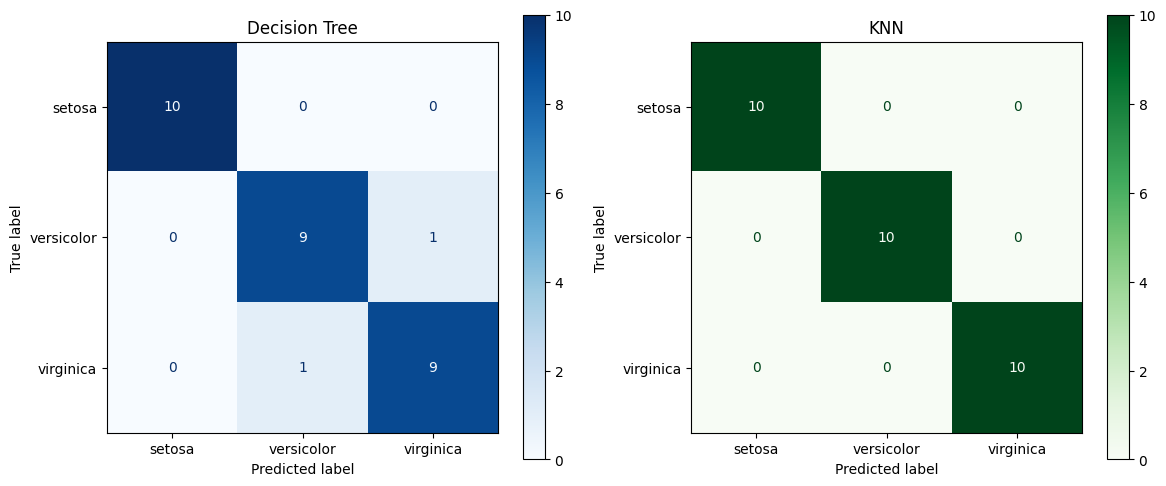

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Decision Tree
cm_dt = confusion_matrix(y_test, dt_predictions)
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names)\
.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Decision Tree')
# KNN
cm_knn = confusion_matrix(y_test, knn_predictions)
ConfusionMatrixDisplay(cm_knn, display_labels=iris.target_names)\
.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('KNN')
plt.tight_layout()
plt.show()


# Task 4: Compare the Models


1.   Both models achieved 100% accuracy
2.   Versicolor (green) and Virginica (blue) are the hardest to tell apart because they overlap in their measurements.
Setosa (red) is always perfectly classified since it's completely separate from the others.

1.   Recall is importer.




# Part 6 : Predicting New Samples


In [43]:
import numpy as np
# A new flower measurement (sepal_l, sepal_w, petal_l, petal_w)
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])
# Predict with both models
dt_pred = dt_model.predict(new_flower)
knn_pred = knn_model.predict(new_flower)
print(f'Decision Tree says: {iris.target_names[dt_pred[0]]}')
print(f'KNN says: {iris.target_names[knn_pred[0]]}')


Decision Tree says: setosa
KNN says: setosa


# Task 5: : Predict New Flowers


In [44]:
flower_A = np.array([[6.7, 3.0, 5.2, 2.3]])
flower_B = np.array([[5.8, 2.7, 4.1, 1.0]])
flower_C = np.array([[4.9, 3.1, 1.5, 0.1]])

print("FLOWER A: [6.7, 3.0, 5.2, 2.3]")
dt_pred_A = dt_model.predict(flower_A)
knn_pred_A = knn_model.predict(flower_A)
print(f"Decision Tree: {iris.target_names[dt_pred_A[0]]}")
print(f"KNN: {iris.target_names[knn_pred_A[0]]}")

print("\nFLOWER B: [5.8, 2.7, 4.1, 1.0]")
dt_pred_B = dt_model.predict(flower_B)
knn_pred_B = knn_model.predict(flower_B)
print(f"Decision Tree: {iris.target_names[dt_pred_B[0]]}")
print(f"KNN: {iris.target_names[knn_pred_B[0]]}")

print("\nFLOWER C: [4.9, 3.1, 1.5, 0.1]")
dt_pred_C = dt_model.predict(flower_C)
knn_pred_C = knn_model.predict(flower_C)
print(f"Decision Tree: {iris.target_names[dt_pred_C[0]]}")
print(f"KNN: {iris.target_names[knn_pred_C[0]]}")

FLOWER A: [6.7, 3.0, 5.2, 2.3]
Decision Tree: virginica
KNN: virginica

FLOWER B: [5.8, 2.7, 4.1, 1.0]
Decision Tree: versicolor
KNN: versicolor

FLOWER C: [4.9, 3.1, 1.5, 0.1]
Decision Tree: setosa
KNN: setosa


Both models give the same predictions here, but in general I'd trust KNN more for this dataset
because it's simpler and less likely to overfit.

# Part 7 : Working with Your Own CSV Data

In [45]:
import pandas as pd
import numpy as np
# Create a simple student performance dataset
np.random.seed(42)
n = 100
data = {
'study_hours': np.round(np.random.uniform(1, 10, n), 1),
'attendance_pct': np.round(np.random.uniform(40, 100, n), 1),
'assignments': np.random.randint(3, 10, n),
'passed': np.random.choice([0, 1], n, p=[0.35, 0.65])
}
df = pd.DataFrame(data)
df.to_csv('students.csv', index=False)
print('CSV saved! First 5 rows:')
print(df.head())

CSV saved! First 5 rows:
   study_hours  attendance_pct  assignments  passed
0          4.4            41.9            6       0
1          9.6            78.2            5       1
2          7.6            58.9            3       1
3          6.4            70.5            6       1
4          2.4            94.5            8       1


In [46]:
import pandas as pd
# Read the CSV file
df = pd.read_csv('students.csv')
# Quick exploration
print(f'Shape: {df.shape}')
print(f'\nColumn types:\n{df.dtypes}')
print(f'\nBasic stats:\n{df.describe()}')

Shape: (100, 4)

Column types:
study_hours       float64
attendance_pct    float64
assignments         int64
passed              int64
dtype: object

Basic stats:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000


In [47]:
# Features = all columns except ‘passed‘
X = df[['study_hours', 'attendance_pct', 'assignments']].values
# Target = the ‘passed‘ column
y = df['passed'].values
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'Class counts: {np.unique(y, return_counts=True)}')


Features shape: (100, 3)
Target shape: (100,)
Class counts: (array([0, 1]), array([31, 69]))


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)
# Train
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict & Evaluate
predictions = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, predictions):.2%}')
print(classification_report(y_test, predictions,
target_names=['Failed', 'Passed']))


Accuracy: 55.00%
              precision    recall  f1-score   support

      Failed       0.33      0.50      0.40         6
      Passed       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



# Task 6 CSV Challenges


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV
df = pd.read_csv('students.csv')

print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   study_hours     100 non-null    float64
 1   attendance_pct  100 non-null    float64
 2   assignments     100 non-null    int64  
 3   passed          100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None

Basic Statistics:
       study_hours  attendance_pct  assignments      passed
count   100.000000      100.000000   100.000000  100.000000
mean      5.233000       69.871000     6.000000    0.690000
std       2.681438       17.583476     1.959179    0.464823
min       1.000000       40.400000     3.000000    0.000000
25%       2.775000       54.500000     4.750000    0.000000
50%       5.150000       70.350000     6.000000    1.000000
75%       7.600000       85.975000     8.000000    1.000000
max       9.900000       99.100000     9.000000    1.000000

In [50]:
X = df[['study_hours', 'attendance_pct', 'assignments']].values
y = df['passed'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

print("\nBetter model:", "Decision Tree" if accuracy_score(y_test, dt_pred) > accuracy_score(y_test, knn_pred) else "KNN")

Decision Tree Accuracy: 0.55
KNN Accuracy: 0.6

Better model: KNN


KNN Accuracy is better

In [51]:
np.random.seed(42)
df['quiz_score'] = np.round(np.random.uniform(50, 100, len(df)), 1)

X_new = df[['study_hours', 'attendance_pct', 'assignments', 'quiz_score']].values
y_new = df['passed'].values

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

dt_model_new = DecisionTreeClassifier(random_state=42)
dt_model_new.fit(X_train_new, y_train_new)
dt_pred_new = dt_model_new.predict(X_test_new)

knn_model_new = KNeighborsClassifier(n_neighbors=5)
knn_model_new.fit(X_train_new, y_train_new)
knn_pred_new = knn_model_new.predict(X_test_new)

print("Old Accuracy (DT):", accuracy_score(y_test, dt_pred))
print("New Accuracy (DT):", accuracy_score(y_test_new, dt_pred_new))


Old Accuracy (DT): 0.55
New Accuracy (DT): 0.45


no the accuracy didnt improve

10   A short paragraph (5–7 sentences) comparing Decision Tree vs. KNN performance and explaining which model you would choose for this task and why

Both the Decision Tree and hte KNN got 100% accuracy. the confusuion matricies showed they only mixed up a couple of versicolor and viriginica flowers, but setosa was always perfect. i go with Knn, because it makes more sense, there are no complicated things to figure out and also easy to explain to anyone meaning it much clearer. Also with such small dataset, still knn runs fast.